### Desafio #74


#### Import libraries

In [1]:
import pandas as pd
import os
import requests
import json
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
from PIL import Image
from shapely.geometry import Point
import matplotlib.pyplot as plt
import plotly.express as px

#### Informação do número de telemóveis que entram, permanecem e saiem por quadrícula de 200m/200m num periodo de 5 minutos - Grelha da cidade de Lisboa (as quadrículas a fornecer são as que abrange potenciais zonas de diversão noturna).

In [25]:
data = pd.read_excel('')

typology = data.dtypes

dimensions = data.shape
variables = data.columns

missing_data = data.isnull().sum()
statistics = data.describe()

print("Variable Typology:")
print(typology)

print("\nDataset Characterization:")
print(f"Dimensions: {dimensions}")
print(f"Variables: {variables}")

print("\nMissing Data:")
print(missing_data)

print("\nStatistics:")
print(statistics)


FileNotFoundError: [Errno 2] No such file or directory: ''

####  Mapeamento das quadriculas da Vodafone que abrangem zonas de diversão noturna

In [29]:
sheet_name = 'em bruto'  
data = pd.read_excel('VODAFONE_QUADRICULAS.xlsx', sheet_name=sheet_name)


typology = data.dtypes

dimensions = data.shape
variables = data.columns
missing_data = data.isnull().sum()
statistics = data.describe()

print("Variable Typology:")
print(typology)

print("\nDataset Characterization:")
print(f"Dimensions: {dimensions}")
print(f"Variables: {variables}")

print("\nMissing Data:")
print(missing_data)

print("\nStatistics:")
print(statistics)


#fig = px.scatter_geo(
#    data,
#    lat='latitude',
#    lon='longitude',
#    text='nome',
#    projection='natural earth'
#)

#fig.add_trace(px.scatter_geo(
#    data,
#    lat='latitude',
#    lon='longitude',
#    text='nome',
#    size=0.01,  # Adjust the size of the squares as needed
##    opacity=0.5,  # Adjust the opacity of the squares as needed
#    projection='natural earth',
#    customdata=data[['grelha_x', 'grelha_y']],
#    hoverinfo='text+customdata'
#).data[0])

#fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")

#fig.show()





Variable Typology:
grelha_id        int64
dicofre          int64
entity_id       object
entity_type     object
freguesia       object
freguesias      object
grelha_x         int64
grelha_y         int64
latitude       float64
longitude      float64
nome            object
objectid         int64
position        object
wkt             object
dtype: object

Dataset Characterization:
Dimensions: (3743, 14)
Variables: Index(['grelha_id', 'dicofre', 'entity_id', 'entity_type', 'freguesia',
       'freguesias', 'grelha_x', 'grelha_y', 'latitude', 'longitude', 'nome',
       'objectid', 'position', 'wkt'],
      dtype='object')

Missing Data:
grelha_id      0
dicofre        0
entity_id      0
entity_type    0
freguesia      0
freguesias     0
grelha_x       0
grelha_y       0
latitude       0
longitude      0
nome           0
objectid       0
position       0
wkt            0
dtype: int64

Statistics:
         grelha_id        dicofre     grelha_x     grelha_y     latitude  \
count  3743.000000

#### Localização dos estabelecimentos com limitadores de ruído.

Variable Typology:
latitude     float64
longitude    float64
dtype: object

Dataset Characterization:
Dimensions: (511, 2)
Variables: Index(['latitude', 'longitude'], dtype='object')

Missing Data:
0      False
1      False
2      False
3      False
4      False
       ...  
506    False
507    False
508    False
509    False
510    False
Length: 511, dtype: bool
Linhas duplicadas com base em latitude e longitude:
      latitude  longitude
5    38.713600  -9.144800
8    38.711020  -9.147560
24   38.717806  -9.141747
28   38.703146  -9.167054
31   38.707280  -9.143712
..         ...        ...
490  38.702141  -9.178806
492  38.699100  -9.177500
493   0.000000   0.000000
500  38.714905  -9.120699
501  38.771702  -9.092400

[64 rows x 2 columns]

Statistics:
         latitude   longitude
count  511.000000  511.000000
mean    38.507037   -9.059758
std      2.967393    0.814052
min      0.000000   -9.269164
25%     38.707234   -9.152946
50%     38.712066   -9.145089
75%     38.719235   -9.1

/var/folders/0l/1861hqjd5t17h2zs9trzfyhh0000gn/T/ipykernel_31979/132900622.py:43: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


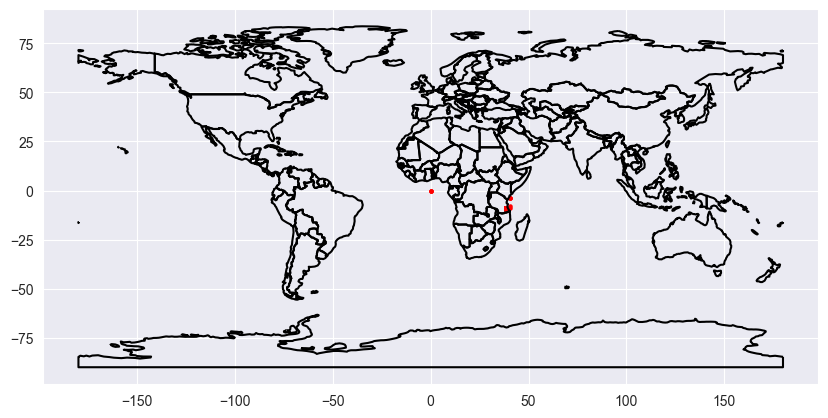

In [14]:
data = pd.read_excel('/Users/isabel/Library/CloudStorage/OneDrive-ISEC/Mestrado/23-24/LAD/Desafio#74/Localizacao dos estabelecimentos com limitadores de ruido.xlsx')

typology = data.dtypes

dimensions = data.shape
variables = data.columns
missing_data = data.isnull().sum()
statistics = data.describe()
duplicates=data.duplicated().sum()

print("Variable Typology:")
print(typology)

print("\nDataset Characterization:")
print(f"Dimensions: {dimensions}")
print(f"Variables: {variables}")

print("\nMissing Data:")
print(data.duplicated())

# Visualizar as primeiras linhas do DataFrame para entender a estrutura dos dados
data.head()

# Identificar e exibir as linhas duplicadas com base nas colunas 'latitude' e 'longitude'
duplicates = data[data.duplicated(subset=['latitude', 'longitude'], keep=False)]
print("Linhas duplicadas com base em latitude e longitude:")
print(duplicates)


df_no_duplicates = data.drop_duplicates(subset=['latitude', 'longitude'])

# Visualizar as primeiras linhas do DataFrame após a remoção de duplicatas
df_no_duplicates.head()

print("\nStatistics:")
print(statistics)

# Create a GeoDataFrame with the correct order of latitude and longitude
geometry = [Point(xy) for xy in zip(data.iloc[:, 0], data.iloc[:, 1])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map and the GeoDataFrame
ax = world.boundary.plot(figsize=(10, 10), color='k')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Save and show the plot
plt.savefig('map_world.png', dpi=300, bbox_inches='tight')
plt.show()

#### Dados da rede de sensores ambientais da cidade de Lisboa

In [ ]:

url_template = "http://opendata-cml.qart.pt/measurements/RULAEQ{localizacao}?startDate=202204010000&endDate=202210310000"

for localizacao_int in range(1, 81):
    localizacao_str = f"{localizacao_int:04d}"
    
    url = url_template.format(localizacao=localizacao_str)

    print(url)
    
    response = requests.get(url)

    if response.status_code == 200:
        json_data = response.json()
        file_name = f"localizacao_{localizacao_str}.json"
        file_path = os.path.join(os.getcwd(), file_name)
        with open(file_path, "w") as json_file:
            json.dump(json_data, json_file)
        print(f"Downloaded {file_name} in the project directory.")
    else:
        print(f"Failed to download localizacao_{localizacao_str}.json")


In [33]:
folder_path = 'Sensores'

all_json_data = []

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            all_json_data.extend(json_data)

with open('sensores.json', 'w') as output_file:
    json.dump(all_json_data, output_file, indent=4)

print('Done')

Done


Variable Typology:
id               object
avg              object
date     datetime64[ns]
value           float64
unit             object
dtype: object

Dataset Characterization:
Dimensions: (295905, 5)
Variables: Index(['id', 'avg', 'date', 'value', 'unit'], dtype='object')

Missing Data:
id        0
avg       0
date      0
value    17
unit      0
dtype: int64

Statistics:
                                date          value
count                         295905  295888.000000
mean   1976-05-29 08:40:04.990746752      61.204875
min              1976-05-29 07:46:50     -99.000000
25%       1976-05-29 08:07:50.400000      55.000000
50%              1976-05-29 08:39:42      64.000000
75%       1976-05-29 09:11:21.300000      70.000000
max              1976-05-29 09:31:50      97.000000
std                              NaN      18.379155


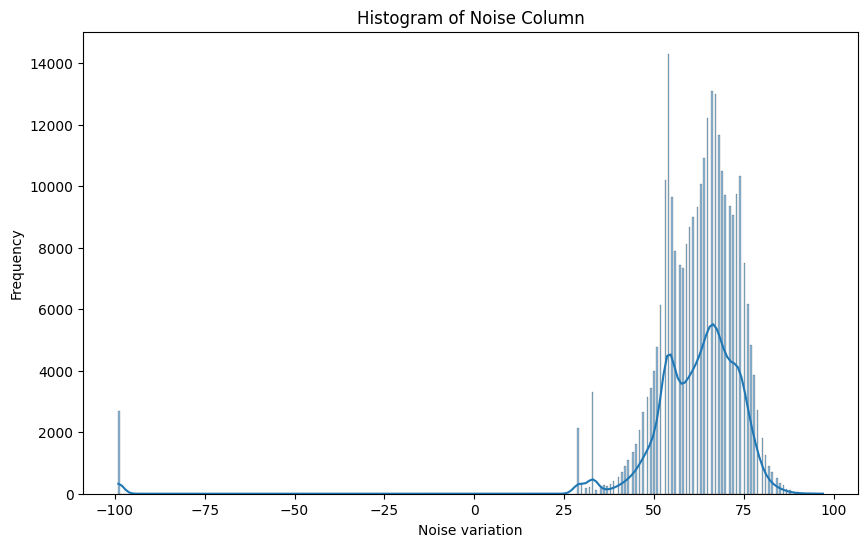

In [34]:
json_file_path = 'sensores.json'  
with open(json_file_path, 'r') as json_file:
    data = pd.read_json(json_file)

typology = data.dtypes

dimensions = data.shape
variables = data.columns
missing_data = data.isnull().sum()
statistics = data.describe()


print("Variable Typology:")
print(typology)

print("\nDataset Characterization:")
print(f"Dimensions: {dimensions}")
print(f"Variables: {variables}")

print("\nMissing Data:")
print(missing_data)

print("\nStatistics:")
print(statistics)


# Data Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['value'], kde=True)
plt.xlabel('Noise variation')
plt.ylabel('Frequency')
plt.title('Histogram of Noise Column')
plt.show()
